Question 4a

In [11]:
import pandas as pd
wine_quality = pd.read_csv('winequality-red.csv', sep=';')


Question 4b

In [12]:
import sklearn.model_selection

# We need to split twice to get training, validation and test splits
train_val_df, test_df = sklearn.model_selection.train_test_split(wine_quality, test_size=0.33, random_state=1)
train_df, validation_df = sklearn.model_selection.train_test_split(train_val_df, test_size=0.5, random_state=1)

# I have arbitrarily decided to split the dataset roughly into 3rds. 
# This is likely not the optimal way to do it as we will see
# Nonetheless it serves as an example for why you would want to vary them


Question 4c

In [13]:
import numpy as np
def concat_ones(X):
    # Add a 1 in front of every training sample for the bias term.
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)


class LR:
    def __init__(self, learn_bias=False):
        self.beta = None
        self.learn_bias = learn_bias

    def fit(self, X, y):
        if self.learn_bias:
            X = concat_ones(X)
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.beta

    def predict(self, X_test):
        if self.learn_bias:
            X_test = concat_ones(X_test)
        if self.beta is None:
            raise ValueError('Fit the linear model before predicting.')
        return X_test @ self.beta
    
model = LR()
    
simple_linear_model = LR(learn_bias=True)
 
X_train = train_df.loc[:, train_df.columns != 'quality'].values 
y_train = train_df['quality'].values  

beta_estimate_train = simple_linear_model.fit(X_train,y_train)                                       
target_predictions_train = simple_linear_model.predict(X_train)

X_test = test_df.loc[:, train_df.columns != 'quality'].values 
y_test = test_df['quality'].values  
                                  
target_predictions_test = simple_linear_model.predict(X_test)

Question 4d

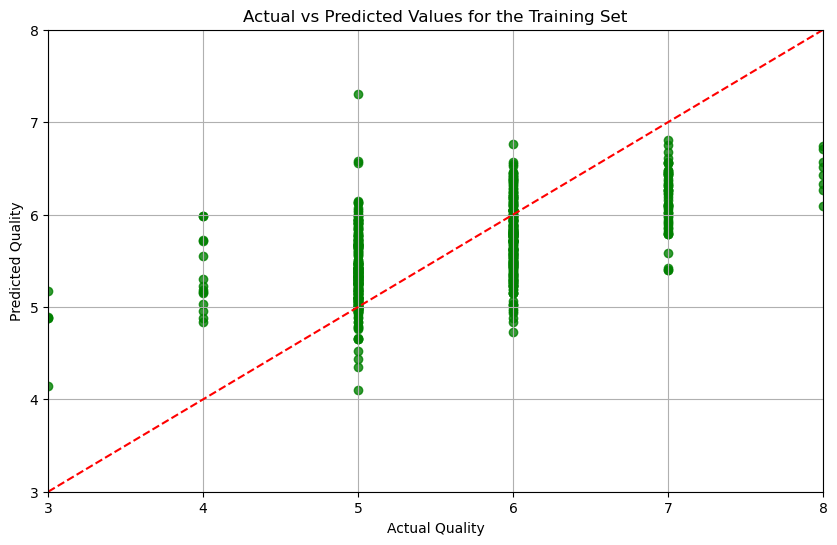

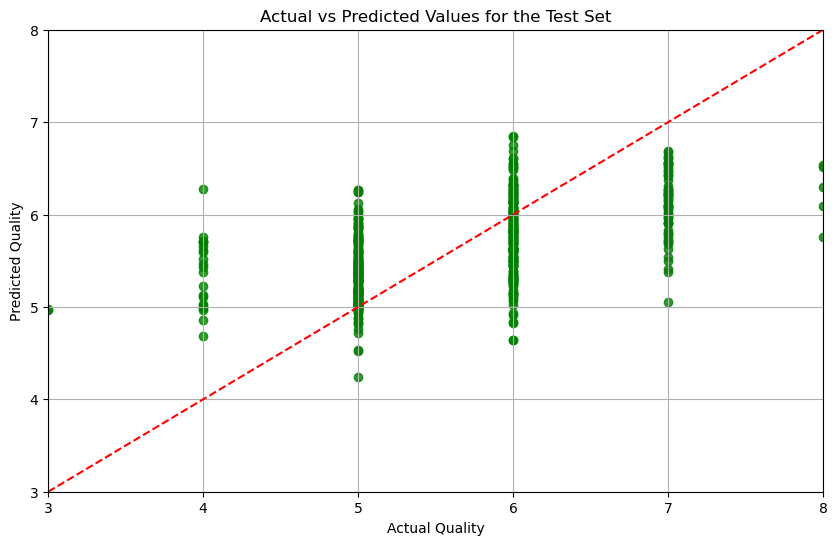

In [14]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='green', alpha=0.8)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.xlim(y_true.min(), y_true.max())
    plt.ylim(y_true.min(), y_true.max())
    plt.grid()
    plt.show()

plot_actual_vs_predicted(y_train,target_predictions_train, "Actual vs Predicted Values for the Training Set")
plot_actual_vs_predicted(y_test,target_predictions_test, "Actual vs Predicted Values for the Test Set")

Conclusions from looking at the plot:  

Error on the test set looks marginally bigger when looking at the tails, but smaller around 5 and 6

Question 4e

In [16]:
def RMSE(y_true, y_pred):
    residues = y_true - y_pred
    return np.sqrt(residues @ residues.T / len(y_true))

RMSE_test = RMSE(y_test,target_predictions_test)
RMSE_train = RMSE(y_train,target_predictions_train)
print(f"Root mean squares for the training set is {RMSE_train}")
print(f"Root mean squares for the test set is {RMSE_test}")

Root mean squares for the training set is 0.6485499246718687
Root mean squares for the test set is 0.6569585527179342


This corroborates the fact that the error is roughly equal across both sets

Question 4f

Iteration 0, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 100, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 200, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 300, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 400, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 500, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 600, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 700, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 800, RMSE: <function RMSE at 0x0000020CDA9089D0>
Iteration 900, RMSE: <function RMSE at 0x0000020CDA9089D0>


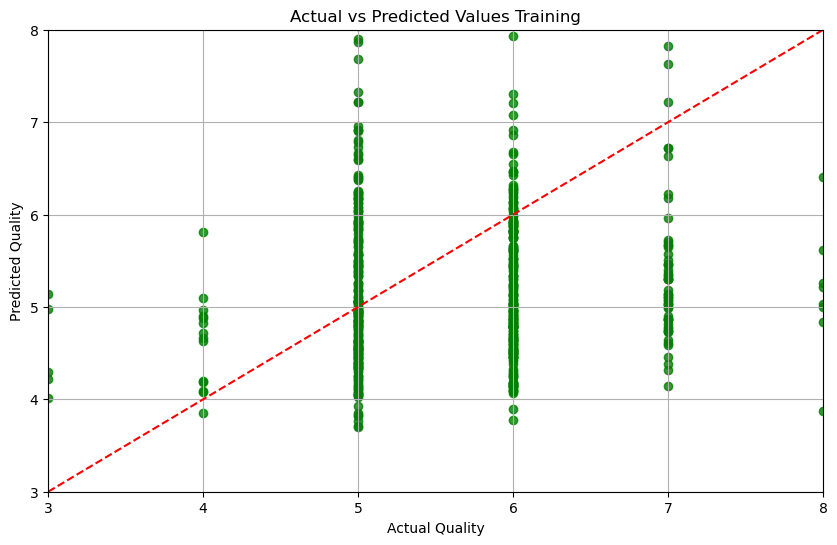

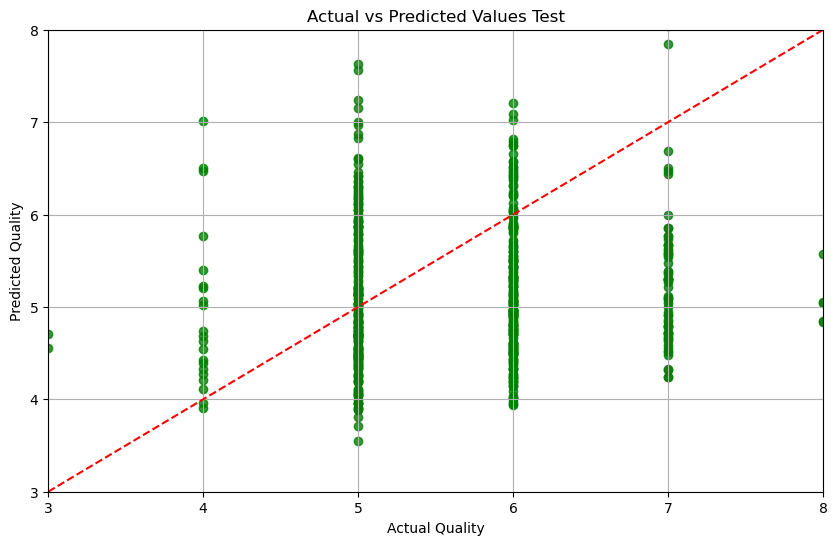

In [21]:
class SimpleLMS:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initializing weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            # Making predictions
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
    

            # Updating weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Printing RMSE every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, RMSE: {RMSE}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

lms_model = SimpleLMS(learning_rate=0.00002, n_iterations=1000)
# Chosen because this works and displays well. Larger learning rates resulted in no proper data
lms_model.fit(X_train, y_train)

# predicting
train_predictions = lms_model.predict(X_train)
test_predictions = lms_model.predict(X_test)

# plotting results
plot_actual_vs_predicted(y_train, train_predictions, "Actual vs Predicted Values Training")
plot_actual_vs_predicted(y_test, test_predictions, "Actual vs Predicted Values Test")

Question 4g

In [23]:
rootmeansq_train_2 = RMSE(y_train, train_predictions)
rootmeansq_test_2 = RMSE(y_test, test_predictions)

print(f"Root mean sqaure for the training set is {rootmeansq_train_2}")
print(f"Root mean square for the test set is {rootmeansq_test_2}")

Root mean sqaure for the training set is 1.1738648930257811
Root mean square for the test set is 1.1935988890169276
